In [19]:
import os #used to interact with filesystem (list folders and files)
import cv2 #opencv used to read and process images
import matplotlib.pyplot as plt #used to display images
import numpy as np

In [20]:
#define dataset path
dataset_path = "../dataset/Testing" #tells python where the dataset is located


In [21]:
#List categories (subfolders)
categories = os.listdir(dataset_path)
print("Categories:", categories)
#gets a list of subfolders inside the dataset

Categories: ['pituitary', 'notumor', 'glioma', 'meningioma']


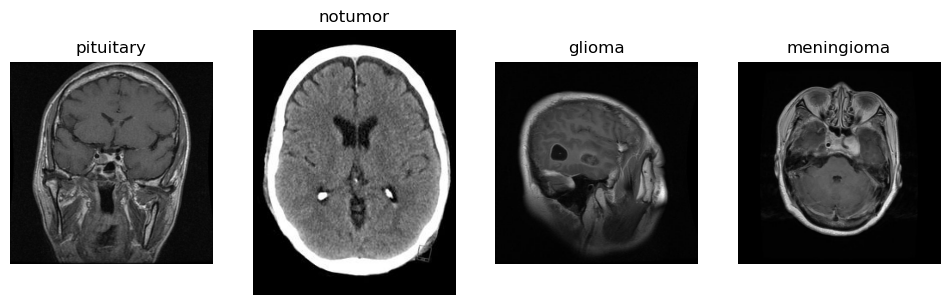

In [22]:
#set up figure for displaying images
fig, axes = plt.subplots(1, len(categories), figsize =(12, 5))
#(creates row with multpile images slots(one per category, sets the figure size to 12x5 inchses)
#Loop through each category and load a sample image
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
#Get the first image file from the category folder
    image_file = os.listdir(category_path)[0]
    image_path = os.path.join(category_path, image_file)
#Read image using OpenCV
    img = cv2.imread(image_path)

#convert BGR to RGB for correct color display
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#Display the image 
    axes[i].imshow(img)
    axes[i].set_title(category)
    axes[i].axis("off")

plt.show()

In [23]:
#Dictionary to store category counts
category_counts = {}

In [24]:
#for loop ot count images in each category
for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path)) #count files
    category_counts[category] = num_images #store count

print("Image count per category:", category_counts)

Image count per category: {'pituitary': 300, 'notumor': 405, 'glioma': 300, 'meningioma': 306}


In [25]:
#extract category names and counts
labels = list(category_counts.keys())
counts = list(category_counts.values())

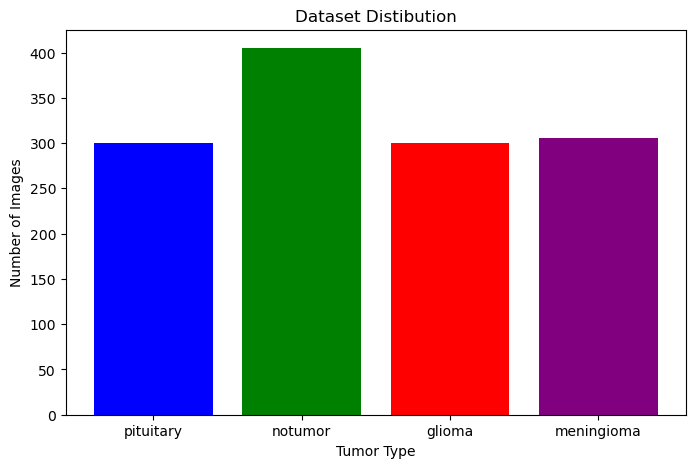

In [26]:
#plot bar chart
plt.figure(figsize=(8,5))
plt.bar(labels, counts, color =['blue', 'green', 'red', 'purple'])
plt.xlabel("Tumor Type")
plt.ylabel("Number of Images")
plt.title("Dataset Distibution")
plt.show()

In [27]:
corrupted_files = []

for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)

        if img is None:
            print(f"⚠️ Corrupted Image: {img_path}")
            corrupted_files.append(img_path)

print(f"Total Corrupted Files: {len(corrupted_files)}")

Total Corrupted Files: 0


In [28]:
output_path = "../dataset/processed"
os.makedirs(output_path, exist_ok =True)

#Target image size
IMAGE_SIZE = (224,224)

In [29]:
#loop through each category
for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    output_category_path = os.path.join(output_path, category)
    os.makedirs(output_category_path, exist_ok = True)
    
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img = cv2.imread(img_path)

        if img is not None:
            resized_img = cv2.resize(img, IMAGE_SIZE)
            utput_img_path = os.path.join(output_category_path, img_file)
            cv2.imwrite(output_img_path, resized_img)

NameError: name 'output_img_path' is not defined

In [ ]:
dataset_path = "../dataset/processed/glioma/"
image_files = os.listdir(dataset_path)  # List all files in the folder

if len(image_files) == 0:
    print("❌ Error: No images found in the folder. Check preprocessing step.")
else:
    sample_img_path = os.path.join(dataset_path, image_files[0])  # Use the first image

    # Load the image
    img = cv2.imread(sample_img_path)

    # Check if image is loaded successfully
    if img is None:
        print(f"❌ Error: Could not load image at {sample_img_path}. Please check the file format.")
    else:
        # Normalize pixel values
        img_normalized = img / 255.0

        print("✅ Image loaded successfully")
        print("Original pixel range:", np.min(img), "to", np.max(img))
        print("Normalized pixel range:", np.min(img_normalized), "to", np.max(img_normalized))

✅ Image loaded successfully
Original pixel range: 0 to 247
Normalized pixel range: 0.0 to 0.9686274509803922
